# Mapping: Mean-State Plots
### Authors

Fletcher Hozven fhozven@ucsb.edu

Samantha Stevenson sstevenson@ucsb.edu

### Table of Contents

[Goals](#purpose)

[Import Packages](#path)

[Read in Data and Convert Units](#data_io)

[Define the Time Period We Are Mapping](#time)

[Plot the Mean State: Global](#map)

[Plot the Mean State: Specific Region](#map2)

<a id='purpose'></a> 
## **Goals**

In this tutorial, we will be creating a map of surface air temperature. Mapping climate data is crucial for understanding and visualizing complex climate patterns, predicting future climate, studying climate change, and informing decisions related to environmental planning and disaster management. 

This tutorial builds on our knowledge of reading in netCDF files developed in the [Time Series Plots](https://github.com/climate-datalab/Time-Series-Plots) repo. For now we'll continue working with the same temperature data file as before; if you need it, it's here:

#### [File for Today: Historical Surface Air Temperature from the Canadian Earth System Model version 5 (CanESM5)](https://drive.google.com/file/d/1TaWe1hs6Lgr-AEM1y74xGA3EBaECyMMV/view?usp=sharing)

This file can also be downloaded from the [Earth System Grid Federation MetaGrid site](https://aims2.llnl.gov) (see the [Web download tutorial](https://climate-datalab.org/data-download-from-web/) if you need more information on how to do this).

<a id='path'></a> 
## **Import Packages**

As always, we begin by importing the necessary packages for our analysis. In addition to those from the previous repo, we'll now add another important one: [Cartopy](https://pypi.org/project/Cartopy/).

### _What is `Cartopy?`_

Cartopy is a package designed for mapping geospatial data. It interfaces with matplotlib to transform data into whichever map projection you choose! Creating a basic map is as simple as telling matplotlib to use a specific map projection, and then adding some coastlines to the axes.

If you do not already have Cartopy installed, you can use conda to do this:

`conda install conda-forge::cartopy`

### _Cartopy tools to import: ccrs, feature_

Here we won't actually import the parent Cartopy package itself, but rather two tools within Cartopy that are incredibly useful for map plotting:

1) Coordinate reference system: `cartopy.crs`

   This allows you to define various projection systems to which to transform your data; in fact, all data within Cartopy has CRS as a parent    class. More information [here](https://scitools.org.uk/cartopy/docs/latest/getting_started/crs.html).

2) Feature database: `cartopy.feature`

   This provides various sets of lines/polygons etc representing different sociopolitical and geographic boundaries, which can be overlain on    a map using a given CRS. More information [here](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html).

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

<a id='data_io'></a> 
## **Read in Data and Convert Units** 

The next necessary step is to read in the data. Here, I've also included a conversion of the `tas` variable in this file to an xarray DataArray, which makes the plotting steps slightly easier - you may choose to include this or not. 

I am also converting the temperature units to Celsius, to make things more intuitive. If you are working with a different data file, it's a good idea to use the `print` statement to double-check the units of your particular data!

In [2]:
# Read in data as xarray Dataset
data = xr.open_dataset('/Users/samstevenson/Box Sync/Climate_DataLab/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc')

In [3]:
# Extract an xarray DataArray containing the tas variable
temp_data = data.tas

# Convert units from Kelvin to Celsius
temp_data = temp_data - 273.15

<a id='time'></a> 
## **Define the Time Period We Are Mapping**

In this example, our goal is to plot a map of mean temperature. This means that the data must have its _dimensions reduced_ to contain only latitude and longitude, to match the coordinates of our map. In other words, we need to average over the time dimension.

There are various choices one can make for this: sometimes, we'll choose to use the entire contents of the data file. But for some applications, we'll be interested in the average over a specific time period. This might be for the purposes of detecting the influence of climate change relative to a reference period, or for simply providing an idea of what the average conditions are. An important skill is therefore to be able to choose our years of interest!

We will do this by using `.sel` and `slice`function to select the time in our data and slice it for whatever time period we want to analyze. 

**Best practices tip:** I like to store the starting and ending years of the time periods as variables, so that they can be easily changed if need be. This should ideally happen _at the start of the notebook_ so they're harder to miss! For teaching purposes for now, however, we'll do it below:

In [5]:
# Specify start and end years of our periods as arrays
start_yr = 1990
end_yr = 2010

# Select data within that range of years from the data array
temp_data_slice = temp_data.sel(time=slice(str(start_yr)+"-01-01", str(end_yr)+"-12-31"))

Note the use of the `str` command above: this simply converts the numerical years to strings which can be concatenated with the rest of the date string that xarray expects. The code block above should yield data that extends from January 1 of `start_yr` to December 31 of `end_yr`: you can play around with this if you want!

<a id='map'></a> 
## **Plot the Mean State: Full Spatial Extent (Global)**

We can now take the time average of our filtered data: this will yield a global surface air temperature dataset with dimensions lat x lon.

In [6]:
# Time average
temp_data_mn = temp_data_slice.mean(dim=["time"])

To Start we will create a GeoAxes object that uses the PlateCarree projection. `PlateCarree` is a cylindrical map projection in which each point is evenly spaced: more information on this projection can be found [here](https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/plate-carree.htm).

The code block below will create our mean-state plot! A detailed breakdown of what each line of the code block is doing follows:

#### 1.  Define projection, figure/axes
- `map = ccrs.PlateCarree()`
- `plt.subplots(figsize=(14, 8))`: Creates a figure and a set of axes for plotting. You can cutomize figsize
- `subplot_kw={"projection": map}`: This sets the map projection for the plot. The map variable was defined above through cartopy.crs

#### 2. Put the data on the map
- `ax.pcolormesh()`: This function creates a 2D color mesh plot
- `global_temp_data.lon and global_temp_data.lat`: These are the longitude and latitude values that are used for the x and y axes 
- `global_temp_data`: This is the variable containing the temperature data that will be plotted
- `transform=map`: This argument specifies that the data will be projected using the defined map projection. We defined map above
- `cmap="coolwarm"`: This sets the colormap to "coolwarm". A full list of available Matplotlib colormaps is [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).
- `vmin=-40, vmax=40`: This sets the range of temperature values to use in the colorbar

#### 3. Specify color bar properties
- `plt.colorbar()`: This adds a color bar to the plot, which represents the temperature
- `plot`: This links the color bar with the plot.
- `ax=ax`: Tells the color bar should be added to the same axes as the plot.
- `cbar.set_label("Temperature (°C)")` = This sets the label for the color bar.

#### 5. Add coastline and border features
- `ax.add_feature(cfeature.COASTLINE)`: Adds a Coastline
- `ax.add_feature(cfeature.BORDERS, linestyle=":")`: This adds political borders between countries to the map and draws borders with a dotted line.

#### 6. Add grid lines
- `ax.gridlines(draw_labels=True, linestyle="--")`: This adds gridlines to the plot and labels to gridlines with -- linestyle
- `gl.top_labels = False` : Removes latitude labels on the top side of the plot.
  
#### 7. Add title and font size parameters for it
- `ax.set_title("Near Air Surface Temperature Mean State Map (1990-2010)")`
- fontsize= 20
- Sets the title for the plot.

#### 8. Look at it!
- `plt.show():` This displays the plot.

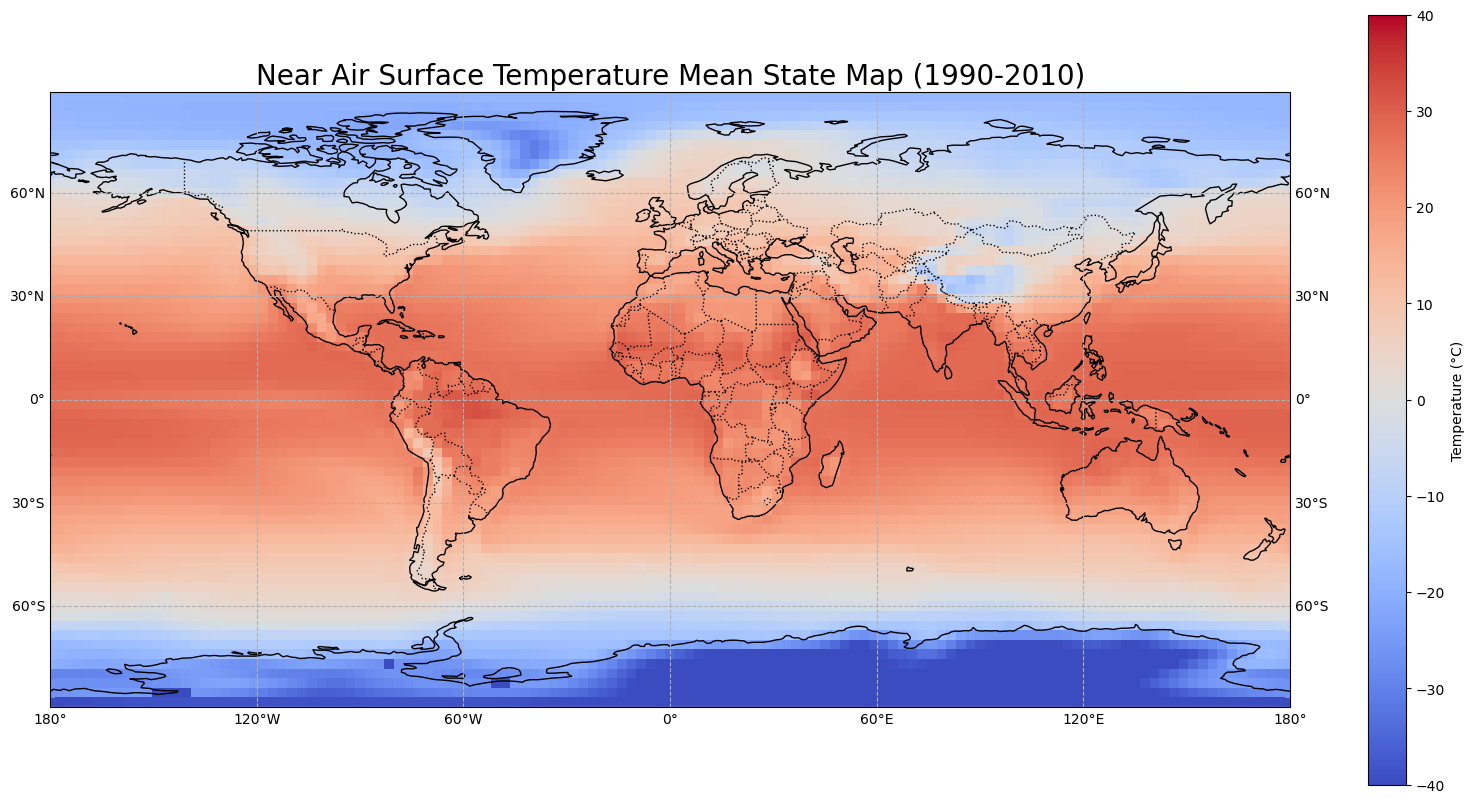

In [9]:
# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})
# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(temp_data_mn.lon, temp_data_mn.lat, temp_data_mn, transform=map, cmap="coolwarm", vmin=-40, vmax=40)
# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")
# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
# Add title, show plot
ax.set_title("Near Air Surface Temperature Mean State Map (1990-2010)", fontsize= 20)
plt.show()

#### Great Job !!


<a id='map2'></a> 
## **Plot the Mean State: Specific Region**

In the section above, we did not do any spatial filtering, either on the data itself or using Cartopy. This resulted in a map spanning the entire planet. That can certainly be useful, but sometimes we're more interested in a map covering only a particular region. 

If you'd like to restrict the spatial range of your data, you can do this in two ways:

1) Filter the underlying data file to only contain information for that region

   You might want to do this for applications where you're _memory limited_ and you want to make your processing speed faster. This comes into play a lot when you're    working with data from many different models/ensemble members. We covered how to spatially filter data in the [Time Series Plots](https://github.com/climate-datalab/Time-Series-Plots) tutorials - just add in the regional average step prior to plotting! 
   
2) Restrict the lat/lon range of the Cartopy plot

   If you're less worried about memory, it can be easier to simply not plot the full dataset and look only at the parts you're interested in. We'll show an example of that below! 
   

Here we'll make a plot for the continental US. This uses exactly the same code as above, except:
- adds a new line setting the spatial extent of the plot using `ax.set_extent`; I used 25-51N, 230-295E to get a rough set of values that included the whole US mainland.
- changes the minimum and maximum temperature ranges: since we're looking at a smaller spatial area, the range of temperature we get will also be smaller than the full global range.

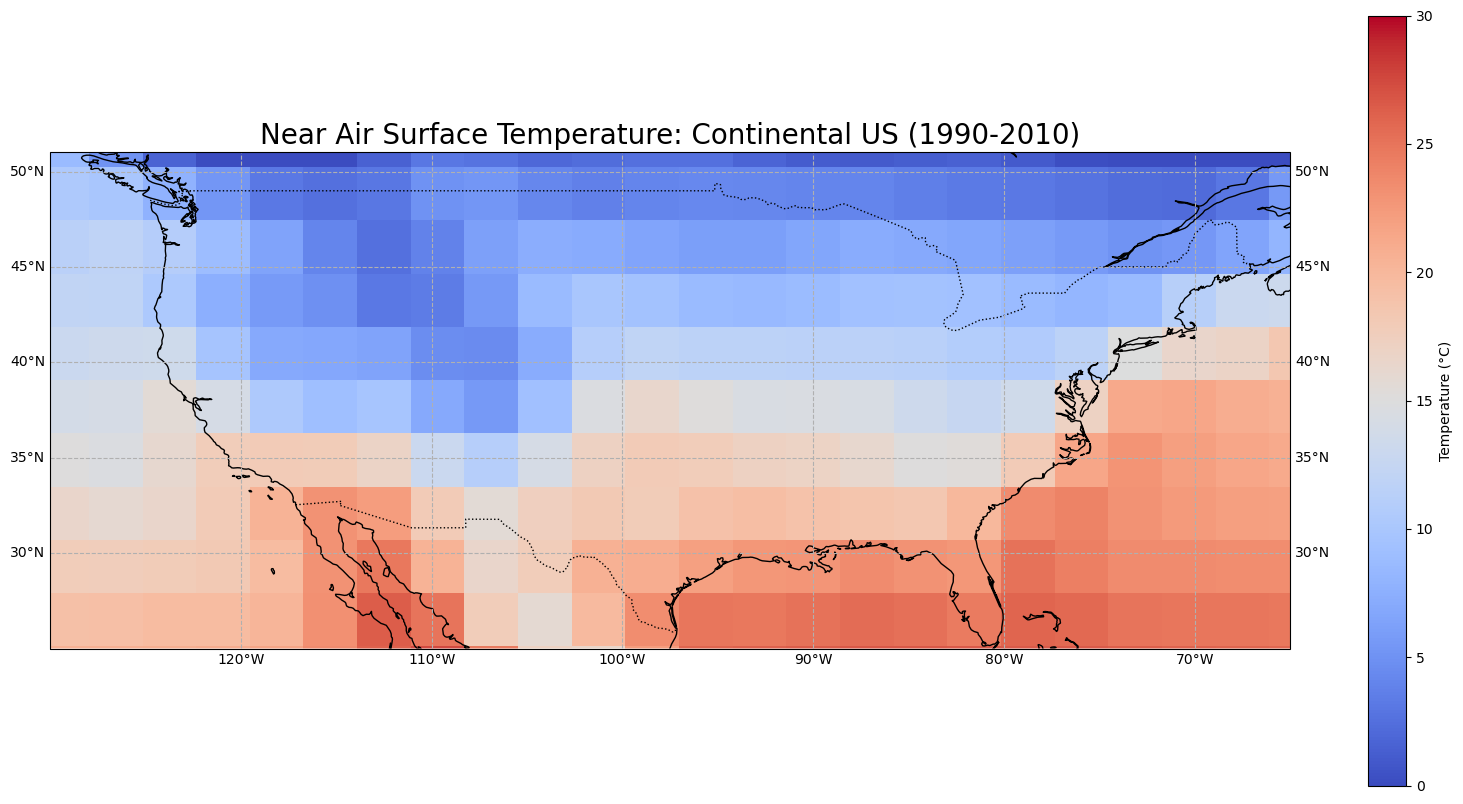

In [14]:
# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})
# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(temp_data_mn.lon, temp_data_mn.lat, temp_data_mn, transform=map, cmap="coolwarm", vmin=0, vmax=30)

# Set spatial extent of plot
ax.set_extent([230, 295, 25, 51], crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")
# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
# Add title, show plot
ax.set_title("Near Air Surface Temperature: Continental US (1990-2010)", fontsize= 20)
plt.show()